In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from utils.df_loader import (
    load_electricity_df,
    load_adult_df,
    load_compas_df,
    load_german_df,
    load_diabetes_df,
    load_breast_cancer_df,
)
from sklearn.model_selection import train_test_split
from utils.preprocessing import preprocess_df
from utils.models import (
    train_three_models,
    evaluation_test,
    save_three_models,
    load_three_models,
)
import utils.cf_proto as util_cf_proto
import utils.dice as util_dice
import utils.gs as util_gs
import utils.watcher as util_watcher
import utils.print as print_f


from utils.save import save_result_as_csv

### Only for alibi, to generate the results from GS and DiCE, commenting this section. ####


seed = 123
# tf.random.set_seed(seed)
# np.random.seed(seed)


In [2]:
RUN_ALIBI = False # (1)True(2)False
TRAIN_MODEL = False # (1)True(2)False
num_instances = 20 # (1)&(2) 20
num_cf_per_instance = 5 # (1)&(2)5

In [3]:
#to ensure the consistency all the experiments was ran on single 3 1070 3090 GPU  M1 GPU. .... OS. 

# github (tf, alibi).
if RUN_ALIBI:
    tf.get_logger().setLevel(40)
    tf.compat.v1.disable_v2_behavior()
    tf.keras.backend.clear_session()
    tf.compat.v1.disable_eager_execution()
    #############################################

    pd.options.mode.chained_assignment = None

    print("TF version: ", tf.__version__)
    print("Eager execution enabled: ", tf.executing_eagerly())  # False    

In [4]:
print("TF version: ", tf.__version__)
print("Eager execution enabled: ", tf.executing_eagerly())  # False    

TF version:  2.15.0
Eager execution enabled:  True


In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


LOADING Dataset: [adult]

	Preprocessing dataset...

	Loading models...

204/204 [==============================] - 0s 288us/step
Model: [Decision Tree] | Accuracy: [0.8217] | Precision: [0.6404 | Recall: [0.6110] | F1: [0.6254]


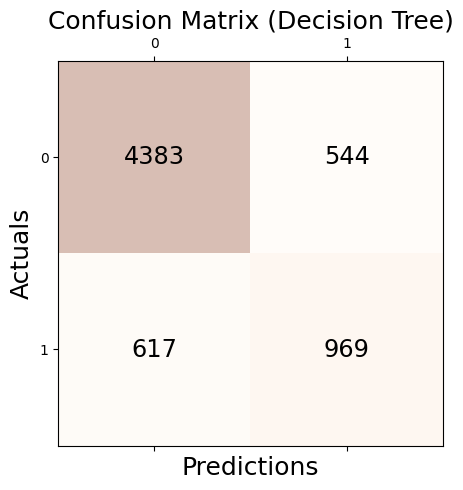

Model: [Random Forest] | Accuracy: [0.8463] | Precision: [0.7082 | Recall: [0.6274] | F1: [0.6653]


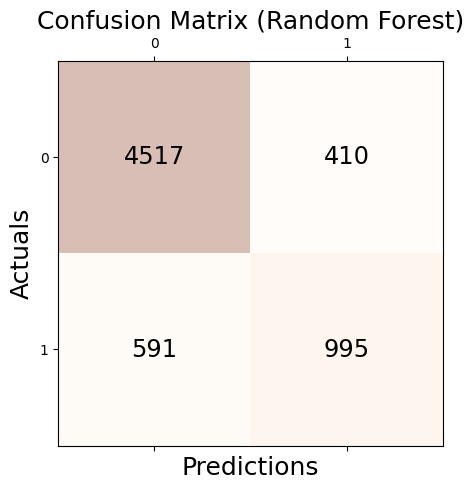

Model: [Neural Network] | Accuracy: [0.8521] | Precision: [0.7498 | Recall: [0.5895] | F1: [0.6601]


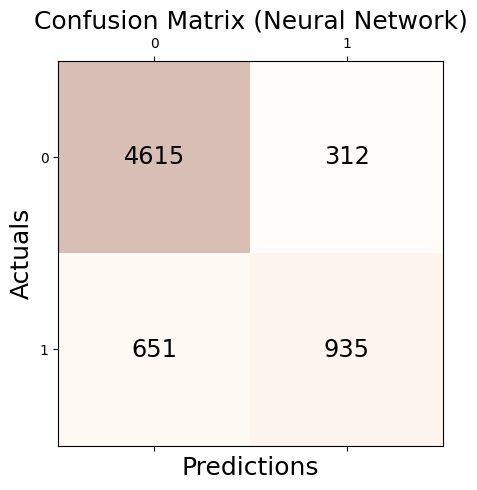

Model: [SVM Linear] | Accuracy: [0.8346] | Precision: [0.7173 | Recall: [0.5296] | F1: [0.6094]


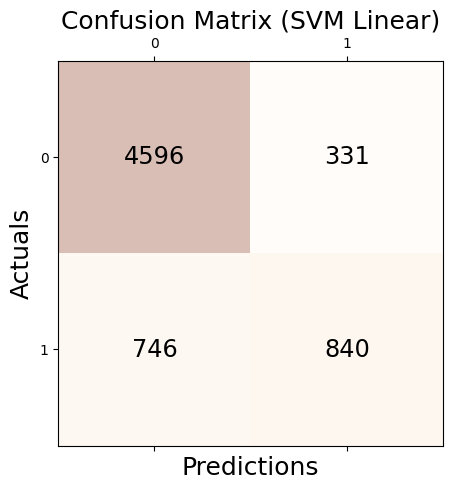

HERE1

====================Counterfactual Algorithm====================
| DiCE 
HERE2
Numerical features
['age', 'capital-gain', 'capital-loss', 'hours-per-week']
Finding counterfactual for dt
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

CF 3



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
100%|██████████| 1/1 [00:00<00:00, 12.31it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

CF 4


100%|██████████| 1/1 [00:00<00:00, 11.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.96it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.85it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.60it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.00it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.85it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.88it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.70it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.69it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.74it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.77it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.79it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.39it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.79it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.93it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.98it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.82it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.19it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.82it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.88it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.75it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.61it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.35it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.00it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.74it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.58it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.57it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.73it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.23it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.52it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.61it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.80it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.11it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.75it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 14
CF 0


100%|██████████| 1/1 [00:00<00:00,  9.59it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.93it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.93it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.28it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.84it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.39it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.30it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.95it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.81it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.79it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.85it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00,  5.34it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.21it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.67it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.69it/s]

instance 19
CF 0



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
100%|██████████| 1/1 [00:00<00:00, 11.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

CF 1


100%|██████████| 1/1 [00:00<00:00, 12.07it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.26it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.76it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Finding counterfactual for rfc
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.54it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.88it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.13it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.82it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.96it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.11it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.82it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.42it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.98it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.96it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.16it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.72it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.00it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.31it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.88it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.80it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.82it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.70it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.51it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.69it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.42it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.91it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.98it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.41it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.99it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.98it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.85it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.13it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.99it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.11it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.08it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.80it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 14
CF 0


100%|██████████| 1/1 [00:00<00:00,  9.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00,  5.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00,  9.13it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00,  8.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00,  8.38it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.95it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.22it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.63it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.17it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.94it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.98it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.21it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.29it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.11it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.26it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.89it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.99it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.44it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.14it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 19
CF 0


100%|██████████| 1/1 [00:00<00:00, 10.87it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 10.84it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.45it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 10.37it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00,  7.49it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Finding counterfactual for nn
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.27it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.49it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.18it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.68it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00,  9.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 10.17it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.83it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.75it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.74it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.41it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.73it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.00it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.13it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.37it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.69it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.86it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.39it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.99it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.88it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.96it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.97it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.08it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00,  9.93it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.71it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.95it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.78it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.11it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.02it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 11.01it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.54it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.25it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.90it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.37it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.40it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.25it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.24it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.39it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.91it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.36it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.14it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.29it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.19it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.33it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.27it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.29it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.26it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.17it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 14
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.06it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.31it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.03it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.33it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00,  5.75it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.21it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.23it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.20it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.28it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.14it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.17it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 11.33it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.35it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.28it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.29it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.24it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 12.27it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 12.15it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 12.24it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.05it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


instance 19
CF 0


100%|██████████| 1/1 [00:00<00:00, 11.62it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 1


100%|██████████| 1/1 [00:00<00:00, 11.99it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 2


100%|██████████| 1/1 [00:00<00:00, 11.85it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 3


100%|██████████| 1/1 [00:00<00:00, 12.32it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


CF 4


100%|██████████| 1/1 [00:00<00:00, 12.14it/s]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Finding counterfactual for svm_linear
instance 0
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]

Could not find counterfactuals for this instance.
4
instance 1
CF 0



  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 2
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 3
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 4
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 5
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 6
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]

Could not find counterfactuals for this instance.
0
CF 1



  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 7
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 8
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 9
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 10
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 11
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 12
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 13
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 14
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 15
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 16
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 17
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 18
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 19
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
HERE3
SAVE
Result has been saved to ./results/dice_adult
DONE
LOADING Dataset: [electricity]

	Preprocessing dataset...

['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
	Loading models...

145/145 [==============================] - 0s 284us/step
Model: [Decision Tree] | Accuracy: [0.8354] | Precision: [0.8375 | Recall: [0.8368] | F1: [0.8371]


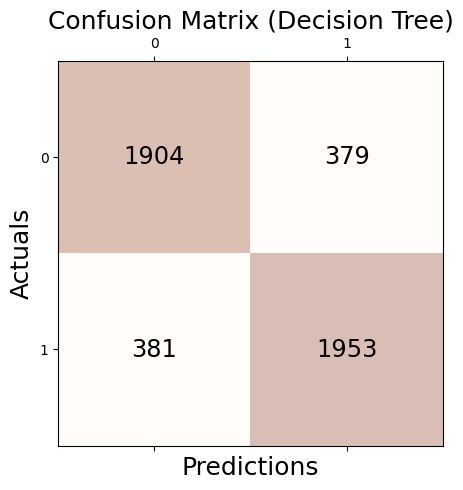

Model: [Random Forest] | Accuracy: [0.8622] | Precision: [0.8653 | Recall: [0.8616] | F1: [0.8635]


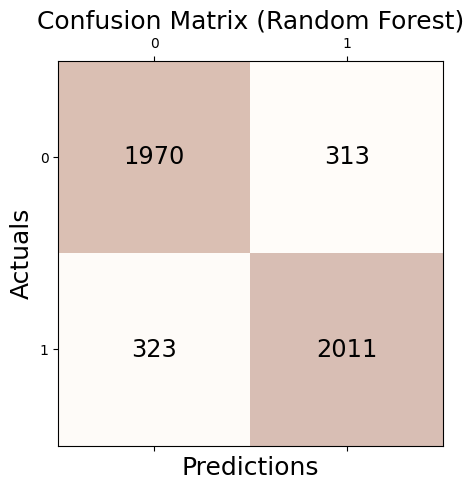

Model: [Neural Network] | Accuracy: [0.7520] | Precision: [0.7634 | Recall: [0.7382] | F1: [0.7506]


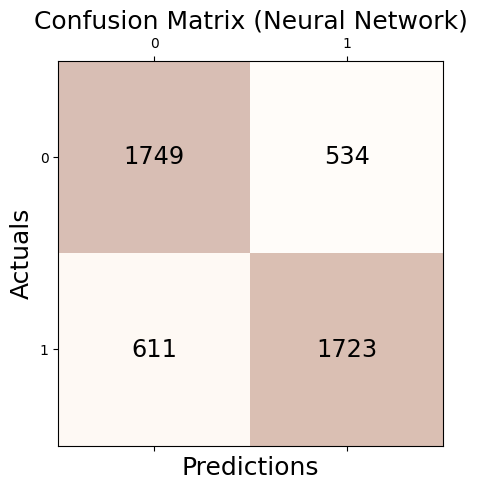

Model: [SVM Linear] | Accuracy: [0.7550] | Precision: [0.7991 | Recall: [0.6885] | F1: [0.7397]


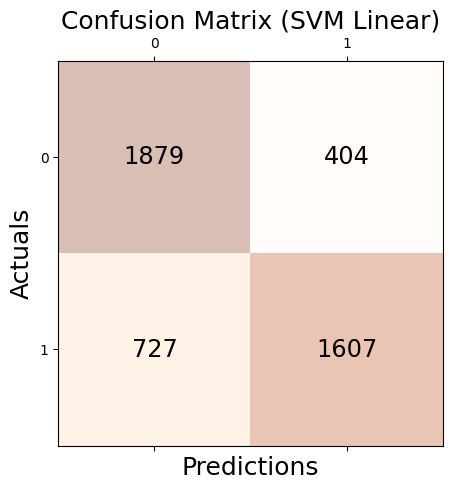

HERE1

====================Counterfactual Algorithm====================
| DiCE 
HERE2
Numerical features
['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']
Finding counterfactual for dt
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00, 104.69it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 99.91it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 109.03it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 111.60it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 109.63it/s]


instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 107.82it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 73.35it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 38.16it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 61.23it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 77.78it/s]


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 105.99it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 110.43it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 109.08it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 102.62it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 106.99it/s]


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 101.75it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 107.71it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 106.80it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 113.73it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 105.83it/s]


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 82.93it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 72.14it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 87.66it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 83.66it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 97.95it/s]


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 92.78it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 101.54it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 105.79it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 108.54it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 107.91it/s]


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 109.61it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 108.96it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 107.64it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 101.80it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 109.79it/s]


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 106.49it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 89.96it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 96.13it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 74.55it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 89.92it/s]


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 72.30it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 98.40it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 98.14it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 102.35it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 102.76it/s]


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 92.43it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 102.51it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 104.02it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 108.76it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 98.19it/s]


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 107.38it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 105.22it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 105.21it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 110.24it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 102.78it/s]


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 104.15it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 101.79it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 112.54it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 91.37it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 91.50it/s]


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 91.55it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 94.86it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 88.34it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 93.87it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 100.78it/s]


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 103.92it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 105.99it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 101.31it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 96.01it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 106.18it/s]


instance 14
CF 0


100%|██████████| 1/1 [00:00<00:00, 106.52it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 105.38it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 109.61it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 103.90it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 100.86it/s]


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 107.12it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 105.42it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 100.35it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 96.97it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 103.46it/s]


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 88.61it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 90.31it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 61.09it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 85.43it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 106.19it/s]


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 107.19it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 111.80it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 104.55it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 102.11it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 93.92it/s]


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 104.88it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 109.54it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 104.95it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 107.17it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 109.96it/s]


instance 19
CF 0


100%|██████████| 1/1 [00:00<00:00, 109.17it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 109.17it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 105.18it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 102.54it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 100.98it/s]


Finding counterfactual for rfc
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00, 38.15it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 29.19it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 42.06it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 41.10it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 27.39it/s]


No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec
Could not find counterfactuals for this instance.
4
instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 32.71it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 37.10it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 37.25it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 33.99it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 33.34it/s]


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 36.62it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 36.09it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 45.63it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 53.18it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 48.72it/s]


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 51.60it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.21it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 51.95it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 53.98it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 54.23it/s]


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 51.69it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.74it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 52.42it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 35.43it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 42.32it/s]


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 52.69it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 51.42it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 49.60it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 49.50it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 50.63it/s]


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 50.97it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 50.94it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 50.87it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 53.46it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 50.00it/s]


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 54.24it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.44it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 50.89it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 35.69it/s]

CF 4

100%|██████████| 1/1 [00:00<00:00, 40.83it/s]


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 49.45it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.64it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 50.58it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 53.70it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 50.88it/s]


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 50.49it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 51.70it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 55.61it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 52.59it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 52.42it/s]


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 43.00it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 44.80it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 26.29it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 52.71it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 45.38it/s]


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 50.40it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 51.83it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 53.43it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 52.50it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 53.29it/s]


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 52.31it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 54.18it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 52.70it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 51.85it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 39.68it/s]


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 46.62it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 44.25it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 31.79it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 54.32it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 42.84it/s]


instance 14
CF 0


100%|██████████| 1/1 [00:00<00:00, 54.23it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 53.37it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 54.46it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 49.98it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 50.19it/s]


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 51.47it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 54.92it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 48.29it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 41.93it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 42.21it/s]


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 47.72it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.30it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 50.60it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 52.42it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 52.53it/s]


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 49.52it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 52.44it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 52.36it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 55.11it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 52.45it/s]


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 53.56it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 54.79it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 42.09it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 49.46it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 47.02it/s]


instance 19
CF 0


100%|██████████| 1/1 [00:00<00:00, 53.18it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 50.83it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 52.84it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 52.80it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 48.80it/s]


Finding counterfactual for nn
instance 0
CF 0


100%|██████████| 1/1 [00:00<00:00, 72.57it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 75.83it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 78.24it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 74.32it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 72.46it/s]


instance 1
CF 0


100%|██████████| 1/1 [00:00<00:00, 71.99it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 56.16it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 60.93it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 66.10it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 78.96it/s]


instance 2
CF 0


100%|██████████| 1/1 [00:00<00:00, 77.53it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 76.62it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 77.31it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 74.23it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 73.78it/s]


instance 3
CF 0


100%|██████████| 1/1 [00:00<00:00, 75.56it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 71.34it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 80.54it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 76.07it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 74.11it/s]


instance 4
CF 0


100%|██████████| 1/1 [00:00<00:00, 64.10it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 58.86it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 63.58it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 69.84it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 72.83it/s]


instance 5
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.21it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 77.77it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 72.40it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 76.00it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 76.72it/s]


instance 6
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.43it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 74.06it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 74.45it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 72.90it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 76.70it/s]


instance 7
CF 0


100%|██████████| 1/1 [00:00<00:00, 75.58it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 70.95it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 77.66it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 68.80it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 73.06it/s]


instance 8
CF 0


100%|██████████| 1/1 [00:00<00:00, 76.97it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 75.50it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 64.97it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 51.29it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 61.69it/s]


instance 9
CF 0


100%|██████████| 1/1 [00:00<00:00, 68.14it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 75.13it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 76.81it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 76.17it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 75.94it/s]


instance 10
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.49it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 76.08it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 75.79it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 77.35it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 80.06it/s]


instance 11
CF 0


100%|██████████| 1/1 [00:00<00:00, 75.43it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 77.46it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 56.35it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 60.05it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 57.61it/s]


instance 12
CF 0


100%|██████████| 1/1 [00:00<00:00, 67.29it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 73.80it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 73.89it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 73.09it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 66.65it/s]


instance 13
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.17it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 78.34it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 76.72it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 72.41it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 71.23it/s]

instance 14
CF 0



100%|██████████| 1/1 [00:00<00:00, 76.25it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 64.80it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 53.46it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 61.25it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 67.17it/s]


instance 15
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.83it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 68.94it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 78.49it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 73.76it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 71.96it/s]


instance 16
CF 0


100%|██████████| 1/1 [00:00<00:00, 75.27it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 72.13it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 74.70it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 74.81it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 74.05it/s]


instance 17
CF 0


100%|██████████| 1/1 [00:00<00:00, 57.62it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 57.31it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 63.26it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 65.03it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 71.48it/s]


instance 18
CF 0


100%|██████████| 1/1 [00:00<00:00, 73.43it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 76.61it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 78.20it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 78.28it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 72.98it/s]


instance 19
CF 0


100%|██████████| 1/1 [00:00<00:00, 74.02it/s]


CF 1


100%|██████████| 1/1 [00:00<00:00, 73.29it/s]


CF 2


100%|██████████| 1/1 [00:00<00:00, 75.99it/s]


CF 3


100%|██████████| 1/1 [00:00<00:00, 73.39it/s]


CF 4


100%|██████████| 1/1 [00:00<00:00, 67.75it/s]


Finding counterfactual for svm_linear
instance 0
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 1
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 2
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 3
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 4
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 5
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 6
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 7
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 8
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 9
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 10
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 11
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 12
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 13
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 14
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 15
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 16
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 17
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 18
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
instance 19
CF 0


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
0
CF 1


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
1
CF 2


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
2
CF 3


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
3
CF 4


  0%|          | 0/1 [00:00<?, ?it/s]


Could not find counterfactuals for this instance.
4
HERE3


IndexError: arrays used as indices must be of integer (or boolean) type

In [6]:
#### Select dataset ####
for dataset_name in [
    "adult",
     "electricity",
    "german",
    "compas",
    "diabetes",
    "breast_cancer",
]:  # [adult, german, compas]
    print(f"LOADING Dataset: [{dataset_name}]\n")
    
    if dataset_name == "electricity":
        dataset_loading_fn = load_electricity_df
    elif dataset_name == "adult":
        dataset_loading_fn = load_adult_df
    elif dataset_name == "german":
        dataset_loading_fn = load_german_df
    elif dataset_name == "compas":
        dataset_loading_fn = load_compas_df
    elif dataset_name == "diabetes":
        dataset_loading_fn = load_diabetes_df
    elif dataset_name == "breast_cancer":
        dataset_loading_fn = load_breast_cancer_df
    else:
        raise Exception("Unsupported dataset")

    print("\tPreprocessing dataset...\n")
    df_info = preprocess_df(dataset_loading_fn)

    train_df, test_df = train_test_split(
        df_info.dummy_df, train_size=0.8, random_state=seed, shuffle=True
    )
    X_train = np.array(train_df[df_info.ohe_feature_names])
    y_train = np.array(train_df[df_info.target_name])
    X_test = np.array(test_df[df_info.ohe_feature_names])
    y_test = np.array(test_df[df_info.target_name])

    if TRAIN_MODEL:
        print("\tTraining models...\n")
        ## Train models.
        models = train_three_models(X_train, y_train)
        ## Save models.
        save_three_models(models, dataset_name)

    ### Load models
    print("\tLoading models...\n")
    models = load_three_models(X_train.shape[-1], dataset_name)

    ### Print out accuracy on testset.
    dt, rf, nn = evaluation_test(models, X_test, y_test)

    if dataset_name in ["diabetes", "breast_cancer"]:
        # run the cf algorithms supporting categorical data.

        # watcher and gs can only run for the datasets containing numerical data only.
        if RUN_ALIBI:
            print_f.print_block(title="Counterfactual Algorithm", content="Watcher")
            results = util_watcher.generate_watcher_result(
                df_info,
                train_df,
                models,
                num_instances,
                num_cf_per_instance,
                X_train,
                X_test,
                y_test,
                max_iters=1000,
                models_to_run=["dt", "rfc", "nn","svm_linear"],
                output_int=True,
            )
            result_dfs = util_watcher.process_result(results, df_info)
            save_result_as_csv("watcher", dataset_name, result_dfs)

        # else:
        print_f.print_block(title="Counterfactual Algorithm", content="GS")
        results, instance_cfs = util_gs.generate_gs_result(
            df_info, test_df, models, num_instances, num_cf_per_instance, 2000
        )
        result_dfs = util_gs.process_results(df_info, results)
        save_result_as_csv("GS", dataset_name, result_dfs)

    if RUN_ALIBI:
        print_f.print_block(title="Counterfactual Algorithm", content="Prototype")
        results = util_cf_proto.generate_cf_proto_result(
            df_info,
            train_df,
            models,
            num_instances,
            num_cf_per_instance,
            X_train,
            X_test,
            y_test,
            max_iters=1000,
            models_to_run=["dt", "rfc", "nn", "svm_linear"],
            output_int=True,
        )
        result_dfs = util_cf_proto.process_result(results, df_info)
        save_result_as_csv("proto", dataset_name, result_dfs)

    else:
        print("HERE1")
        print_f.print_block(title="Counterfactual Algorithm", content="DiCE")
        print("HERE2")
        results = util_dice.generate_dice_result(
            df_info,
            test_df,
            models,
            num_instances,
            num_cf_per_instance,
            sample_size=50,
            models_to_run=["dt", "rfc", "nn", "svm_linear"],
        )
        print("HERE3")
        result_dfs = util_dice.process_results(df_info, results)
        print("SAVE")
        save_result_as_csv("dice", dataset_name, result_dfs)
        print("DONE")


In [ ]:
t = preprocess_df(dataset_loading_fn)
t.categorical_cols

['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer']


['target']

In [8]:
df_info

DfInfo(df=           date    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0      0.429715  0.106383  0.041431   0.166022  0.003467   0.422915  0.414912   
1      0.455909  0.574468  0.070434   0.578846  0.005164   0.720093  0.177632   
2      0.442724  0.702128  0.062207   0.528563  0.004285   0.545054  0.415351   
3      0.881333  0.468085  0.032785   0.348557  0.002081   0.280684  0.662719   
4      0.885138  0.489362  0.034917   0.518001  0.002462   0.582859  0.225877   
...         ...       ...       ...        ...       ...        ...       ...   
23079  0.911331  0.319149  0.045455   0.486760  0.003018   0.542983  0.420175   
23080  0.474183  0.808511  0.027381   0.303184  0.001753   0.136199  0.837719   
23081  0.912128  0.446809  0.043503   0.350788  0.002867   0.265924  0.659211   
23082  0.885403  0.914894  0.027141   0.434692  0.001843   0.418954  0.544737   
23083  0.000796  0.574468  0.090939   0.308242  0.003467   0.422915  0.414912   

      target  
0 

In [7]:
df_info

DfInfo(df=           date    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0      0.429715  0.106383  0.041431   0.166022  0.003467   0.422915  0.414912   
1      0.455909  0.574468  0.070434   0.578846  0.005164   0.720093  0.177632   
2      0.442724  0.702128  0.062207   0.528563  0.004285   0.545054  0.415351   
3      0.881333  0.468085  0.032785   0.348557  0.002081   0.280684  0.662719   
4      0.885138  0.489362  0.034917   0.518001  0.002462   0.582859  0.225877   
...         ...       ...       ...        ...       ...        ...       ...   
23079  0.911331  0.319149  0.045455   0.486760  0.003018   0.542983  0.420175   
23080  0.474183  0.808511  0.027381   0.303184  0.001753   0.136199  0.837719   
23081  0.912128  0.446809  0.043503   0.350788  0.002867   0.265924  0.659211   
23082  0.885403  0.914894  0.027141   0.434692  0.001843   0.418954  0.544737   
23083  0.000796  0.574468  0.090939   0.308242  0.003467   0.422915  0.414912   

      target  
0 

In [1]:
!pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 9.9 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.6 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Suc